# Plotting Mekong Development Map


## Table of contents
1. [Mekong Infrastructure Tracker](#1)<br>
    1.1 [Data](#11)<br>
    1.2 [Plotting interative energy map](#12)<br>


5. [References](#5)<br>

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
pd.options.mode.chained_assignment = None


# Make Plotly work in your Jupyter Notebook
# import cufflinks as cf
# import chart_studio.plotly as py
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# # Use Plotly locally
# cf.go_offline()

## 1 Mekong Infrastructure Tracker <a id="1"></a>
abcd

### 1.1 Data <a id="11"></a>

In [2]:
# Import geodata
mekong_geo = json.load(open("mekong/mekong_infrastructure_tracker.geojson", "r", encoding='utf8'))
mekong_df = pd.read_csv('mekong/mekong_infrastructure.csv')

#Edit data
mek_df = mekong_df[['Project Name','Subtype','Year of Completion','Capacity (MW)','Latitude','Longitude']]
mek_df['text'] = mek_df['Project Name'] + '<br> Capacity ' + (mek_df['Capacity (MW)']).astype(str)+'W'
mek_df['Capacity'] = mek_df['Capacity (MW)'].fillna(0)

### 1.2 Plotting interative energy map <a id="12"></a>

Bubble Map with go.Scattergeo

See https://plotly.com/python/reference/scatter/#scatter-marker-sizeref for more information. Additionally, we recommend setting the sizemode attribute: https://plotly.com/python/reference/scatter/#scatter-marker-sizemode to area.

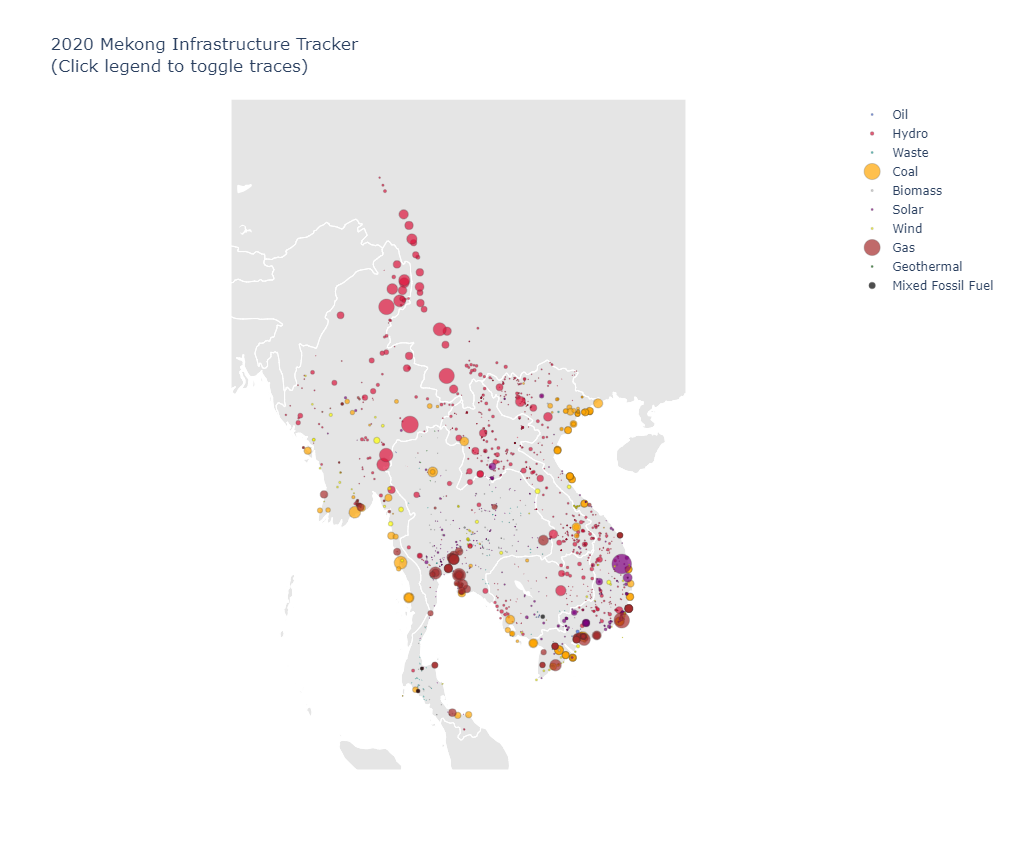

In [8]:
import plotly.graph_objects as go

categories = ['Oil', 'Hydro', 'Waste', 'Coal', 'Biomass', 'Solar', 'Wind', 'Gas', 'Geothermal', 'Mixed Fossil Fuel'] # Order
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey",'purple','yellow','brown','darkgreen','black']
# cities]
scale = 50

fig = go.Figure()

for i, cat in enumerate(categories):
    mek_sub = mek_df[mek_df['Subtype']==cat]
    fig.add_trace(go.Scattergeo(
        locationmode = 'geojson-id',
        lon = mek_sub['Longitude'],
        lat = mek_sub['Latitude'],
        text = mek_sub['text'],
        marker = dict(
         size = mek_sub['Capacity']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width= 0.3,
            sizemode = 'area'
        ),
        name = '{}'.format(cat)
    )
    )
fig.update_layout(
        title_text = '2020 Mekong Infrastructure Tracker <br>(Click legend to toggle traces)',
        showlegend = True,
        autosize = False,
        width = 1000,
        height = 850,
        geo = go.layout.Geo(
        resolution = 50,
        scope = 'asia',
        showframe = False,
        showcoastlines = True,
        lonaxis_range = [ 90.0, 112.0 ],
        lataxis_range = [ 5.0, 35.0 ],
        landcolor = "rgb(229, 229, 229)",
        countrycolor = "white" ,
        coastlinecolor = "white",
        projection_type = 'mercator',
        domain = dict(x = [ 0, 1.0 ], y = [ 0, 1.0 ])
    )
)
fig.show('browser')

<img src="figures/mekong_infra.png" alt="drawing" style="width:700px;"/>
